In [ ]:
%matplotlib inline

# Basics
import pandas as pd
import numpy as np
# import tensorflow as tf
from numpy import quantile, where, random, array
from collections import Counter
from collections import defaultdict
from itertools import cycle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize, label_binarize, LabelBinarizer
from sklearn.datasets import make_classification
# !pip install util
# from util import record2str, neuclidean
# from datamanager import prepare_adult_dataset, prepare_dataset

# Visualization
import matplotlib.pyplot as plt
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

!pip install pyod
# Outlier Detection
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from pyod.models.hbos import HBOS
from pyod.models.knn import KNN
from pyod.models.abod import ABOD

# Dimensionality Reduction
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.manifold import MDS, Isomap, TSNE
from sklearn import random_projection
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
import random

# Imbalanced Learning
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Learners
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neural_network import MLPClassifier
# EnsembleClassifier
from sklearn.ensemble import IsolationForest, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor

# Evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, r2_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from scipy import stats

# Hypertuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, learning_curve, KFold
from sklearn import model_selection

# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.layers import LSTM

# # TimeSeries Analysis
!pip install tslearn
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.datasets import CachedDatasets

# # TS Approximation
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
from sklearn.metrics import pairwise_distances
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from tslearn.utils import ts_size

from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from scipy.spatial.distance import cdist

# # Shapelet
from tslearn.shapelets import ShapeletModel, grabocka_params_to_shapelet_size_dict, LearningShapelets
!pip install pyts
from pyts.transformation import ShapeletTransform

# # TS Clustering
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

# warning
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

## Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# import dataset
df_train = pd.read_csv("/content/drive/MyDrive/Data-Mining/ravdess_features_dm2/RavdessAudioOnlyFeatures_TRAIN.csv", skipinitialspace=True)

df_test = pd.read_csv("/content/drive/MyDrive/Data-Mining/ravdess_features_dm2/RavdessAudioOnlyFeatures_TEST.csv", skipinitialspace=True)

In [ ]:
df_train.describe(include="all")

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
count,1828,1828,1828,1828,1828,1828,1828.000000,1828,1828,1828.000000,...,1828.0,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.0,1828.000000,1828.000000
unique,1,2,8,2,2,2,NaN,2,1828,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,audio-only,speech,calm,normal,Kids are talking by the door,1st,NaN,M,03-01-01-01-01-01-01.wav,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1828,1080,280,984,914,914,NaN,936,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,9.295405,NaN,NaN,194588.269694,...,1.0,0.120335,0.201699,0.456521,0.666192,0.842724,0.999818,1.0,-0.555631,-0.389952
std,NaN,NaN,NaN,NaN,NaN,NaN,5.079148,NaN,NaN,28480.301163,...,0.0,0.130108,0.168295,0.167305,0.123141,0.078090,0.005041,0.0,0.776547,0.433813
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,140941.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.007891,0.839625,1.0,-1.644320,-1.938627
25%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,171371.000000,...,1.0,0.014703,0.051222,0.342588,0.609088,0.812227,1.000000,1.0,-1.007945,-0.636543
50%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,188989.000000,...,1.0,0.070476,0.161748,0.475102,0.683680,0.855090,1.000000,1.0,-0.745296,-0.405489
75%,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,214614.000000,...,1.0,0.189830,0.335955,0.590281,0.747868,0.889619,1.000000,1.0,-0.316342,-0.156594


In [ ]:
df_train.shape

(1828, 434)

In [ ]:
df_train.dtypes

modality                object
vocal_channel           object
emotion                 object
emotional_intensity     object
statement               object
                        ...   
stft_q75_w4            float64
stft_q95_w4            float64
stft_q99_w4            float64
stft_kur_w4            float64
stft_skew_w4           float64
Length: 434, dtype: object

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Columns: 434 entries, modality to stft_skew_w4
dtypes: float64(405), int64(21), object(8)
memory usage: 6.1+ MB


In [ ]:
df_train.isnull().any()

modality               False
vocal_channel          False
emotion                False
emotional_intensity    False
statement              False
                       ...  
stft_q75_w4            False
stft_q95_w4            False
stft_q99_w4            False
stft_kur_w4            False
stft_skew_w4           False
Length: 434, dtype: bool

In [ ]:
y_train = np.array(df_train['vocal_channel'])

In [ ]:
X_train = df_train.drop("vocal_channel", axis='columns')

In [ ]:
y_test = np.array(df_test['vocal_channel'])

In [ ]:
X_test = df_test.drop("vocal_channel", axis='columns')

In [ ]:
np.unique(y_train, return_counts=True)

(array(['song', 'speech'], dtype=object), array([ 748, 1080]))

In [ ]:
Counter(y)

Counter({'speech': 1080, 'song': 748})

In [ ]:
np.random.choice(np.arange(len(X)), 3, replace=False)

array([1030,  709,  560])

In [ ]:
color0 = '#FD4F0F'
color1 = '#15B985'
colordark0 = '#882501'
colordark1 = '#448D76'

colors =[color0,color1]
colorsdark = [colordark0 ,colordark1]

<AxesSubplot:ylabel='vocal_channel'>

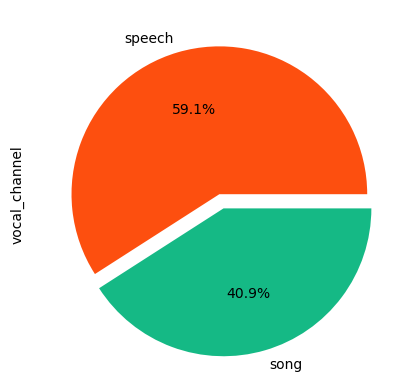

In [ ]:
df_train['vocal_channel'].value_counts().plot(kind = 'pie', colors = (color0, color1),explode= (0,0.1),autopct='%1.1f%%')

In [ ]:
np.unique(df_train["emotion"], return_counts=True)

(array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad',
        'surprised'], dtype=object),
 array([280, 280, 144, 280, 280, 140, 280, 144]))

<AxesSubplot:xlabel='count', ylabel='emotion'>

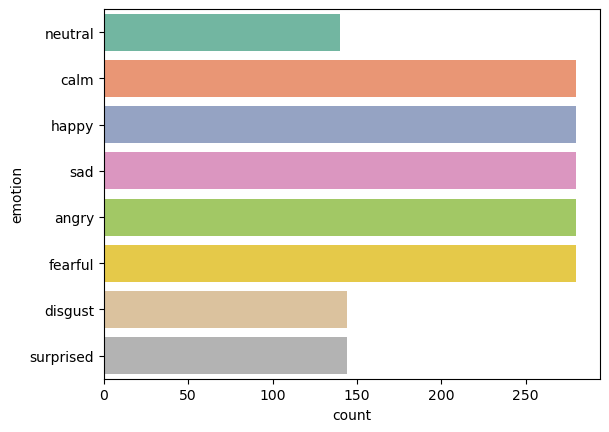

In [ ]:
sns.countplot(y = df_train["emotion"], palette = "Set2")

/Users/mumer/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emotion', ylabel='count'>

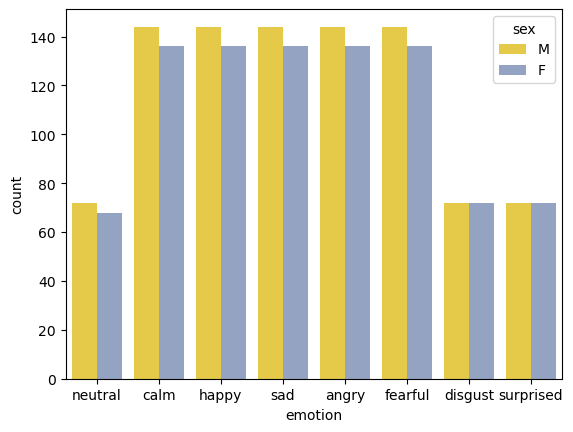

In [ ]:
sns.countplot(df_train["emotion"], hue = df_train["sex"], palette = "Set2_r")

In [ ]:
#Imbalanced data Not exists
imb_df = df_train[["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"]]

In [ ]:
np.unique(imb_df, return_counts=True)

(array(['1st', '2nd', 'Dogs are sitting by the door', 'F',
        'Kids are talking by the door', 'M', 'audio-only', 'normal',
        'song', 'speech', 'strong'], dtype=object),
 array([ 914,  914,  914,  892,  914,  936, 1828,  984,  748, 1080,  844]))

In [ ]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y

    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [ ]:
#For binaryclass
X_train = df_train.drop(["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"], axis='columns')
y_train = df_train["vocal_channel"]
y_train = y_train.ravel()

X_test = df_test.drop(["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"], axis='columns')
y_test = df_test["vocal_channel"]
y_test = y_test.ravel()

lb = MyLabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.fit_transform(y_test)
n_classes = y_train_bin.shape[1]

print(X_train.shape)
print(y_train.shape)
print(y_train_bin)
print(y_train_bin.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test_bin)
print(y_test_bin.shape)

(1828, 425)
(1828,)
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
(1828, 2)
(624, 425)
(624,)
[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
(624, 2)


In [ ]:
pre = preprocessing.LabelEncoder()
b = np.unique(y_train)
pre.fit(b)
y_train = pre.transform(y_train)
y_test = pre.transform(y_test)

In [ ]:
#For multiclass
X_train = df_train.drop(["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"], axis='columns')
y_train = df_train["emotion"]
y_train = y_train.ravel()

X_test = df_test.drop(["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"], axis='columns')
y_test = df_test["emotion"]
y_test = y_test.ravel()

y_train_bin = label_binarize(y_train, classes=["neutral", "calm", "happy", "sad", "angry", "fearful", "disgust", "surprised"])
y_test_bin = label_binarize(y_test, classes=["neutral", "calm", "happy", "sad", "angry", "fearful", "disgust", "surprised"])
n_classes = y_train_bin.shape[1]

print(X_train.shape)
print(y_train.shape)
print(y_train_bin)
print(y_train_bin.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test_bin)
print(y_test_bin.shape)

(1828, 425)
(1828,)
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
(1828, 8)
(624, 425)
(624,)
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]
(624, 8)


## Data Understanding

Fitting 10 distributions: 100%|█████████████████| 10/10 [00:00<00:00, 20.30it/s]


Text(0.5, 1.0, 'stft_kur_w4')

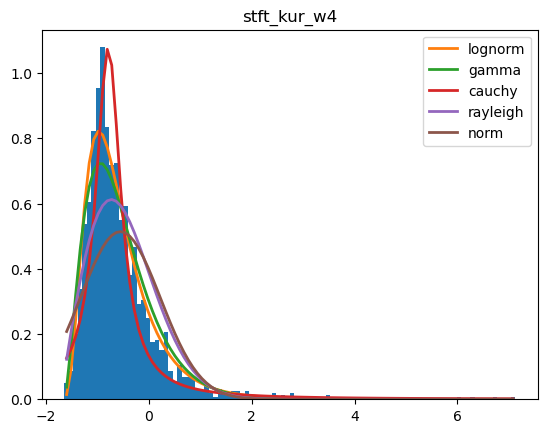

In [ ]:
X1 = df_train["stft_kur_w4"].values
f = Fitter(X1, distributions=get_common_distributions())
f.fit()

f.hist()
f.plot_pdf()
pylab.grid(False)
pylab.title('stft_kur_w4')

Fitting 10 distributions: 100%|█████████████████| 10/10 [00:00<00:00, 22.79it/s]


Text(0.5, 1.0, 'skew')

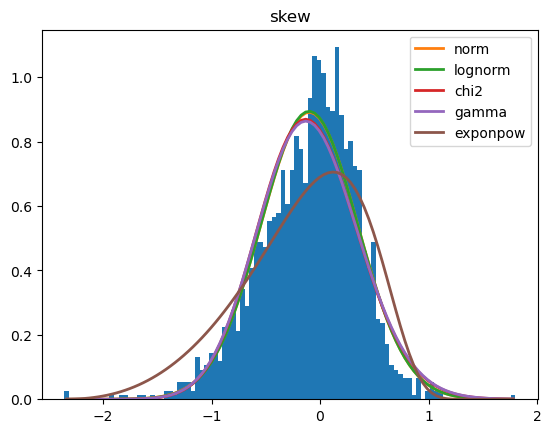

In [ ]:
X1 = df_train["skew"].values
f = Fitter(X1, distributions=get_common_distributions())
f.fit()

f.hist()
f.plot_pdf()
pylab.grid(False)
pylab.title('skew')

Fitting 10 distributions: 100%|█████████████████| 10/10 [00:00<00:00, 19.27it/s]


Text(0.5, 1.0, 'frame_count')

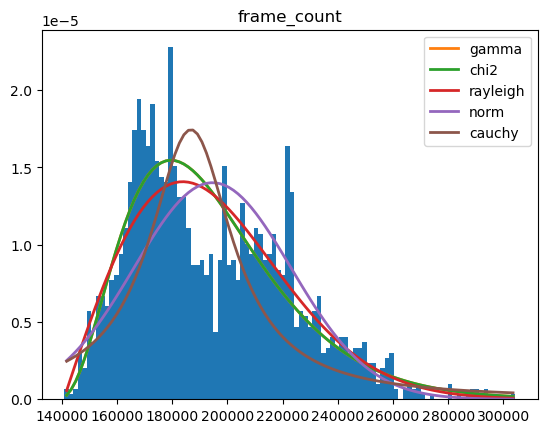

In [ ]:
X1 = df_train["frame_count"].values
f = Fitter(X1, distributions=get_common_distributions())
f.fit()

f.hist()
f.plot_pdf()
pylab.grid(False)
pylab.title('frame_count')

Fitting 10 distributions: 100%|█████████████████| 10/10 [00:00<00:00, 18.80it/s]


Text(0.5, 1.0, 'mfcc_std_w3')

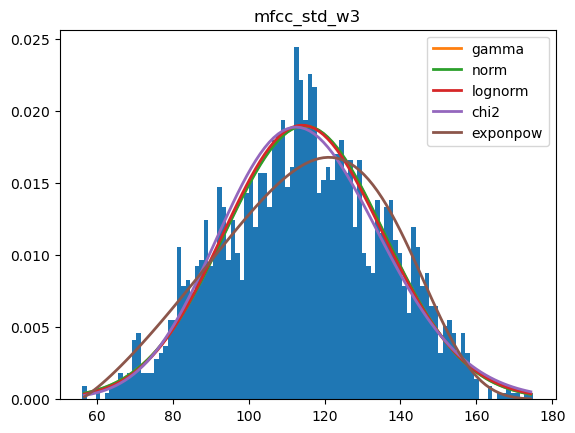

In [ ]:
X1 = df_train["mfcc_std_w3"].values
f = Fitter(X1, distributions=get_common_distributions())
f.fit()

f.hist()
f.plot_pdf()
pylab.grid(False)
pylab.title('mfcc_std_w3')

In [ ]:
df = pd.concat((df_train, df_test), axis=0)
df.shape

(2452, 434)

# Basic Classification

## Decision Tree

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.9214743589743589
F1-score [0.90909091 0.93088858]
              precision    recall  f1-score   support

        song     0.8909    0.9280    0.9091       264
      speech     0.9456    0.9167    0.9309       360

    accuracy                         0.9215       624
   macro avg     0.9182    0.9223    0.9200       624
weighted avg     0.9224    0.9215    0.9217       624



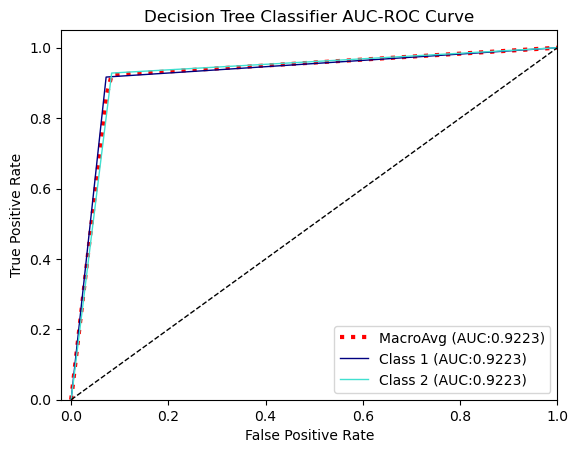

In [ ]:
# Inizializziamo il classifier
clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=0))
y_score = clf.fit(X_train, y_train_bin).predict_proba(X_test)

# Calcoliamo FalsePositiveRate e TruePositiveRate per ogni classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcoliamo microaverage
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Mettiamo tutti i FPR insieme
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plottiamo i ROC curves
plt.figure()

# Macro
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="MacroAvg (AUC:{0:0.4f})".format(roc_auc["macro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

# Curve per ogni classe
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="Class {0} (AUC:{1:0.4f})".format((i+1), roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree Classifier AUC-ROC Curve")
plt.legend(loc="lower right")
plt.show()

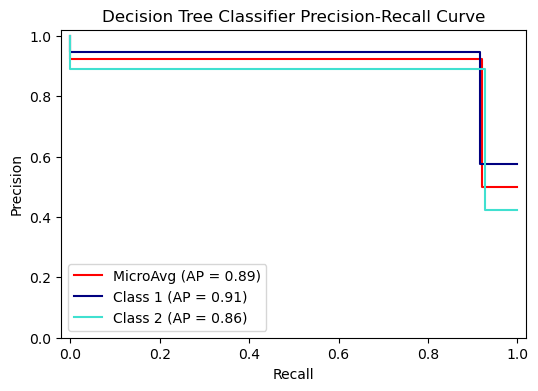

In [ ]:
# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# MicroAvg calcola score di tutte le classi
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])

_, ax = plt.subplots(figsize=(6, 4))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="MicroAvg", color="red")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Class {(i+1)}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([-.02, 1.02])
ax.set_ylim([0.0, 1.02])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Decision Tree Classifier Precision-Recall Curve")
plt.show()

## KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits = 4))

Accuracy 0.8493589743589743
F1-score [0.82909091 0.86532951]
              precision    recall  f1-score   support

        song     0.7972    0.8636    0.8291       264
      speech     0.8935    0.8389    0.8653       360

    accuracy                         0.8494       624
   macro avg     0.8453    0.8513    0.8472       624
weighted avg     0.8528    0.8494    0.8500       624



In [ ]:
knn = KNeighborsClassifier(algorithm='brute', n_neighbors=32, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits = 4))

Accuracy 0.8205128205128205
F1-score [0.7751004  0.85066667]
              precision    recall  f1-score   support

        song     0.8248    0.7311    0.7751       264
      speech     0.8179    0.8861    0.8507       360

    accuracy                         0.8205       624
   macro avg     0.8214    0.8086    0.8129       624
weighted avg     0.8208    0.8205    0.8187       624



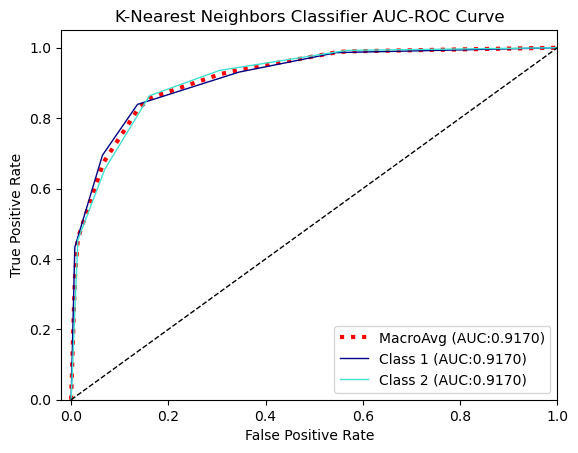

In [ ]:
# Inizializziamo il classifier
clf = OneVsRestClassifier(KNeighborsClassifier())
y_score = clf.fit(X_train, y_train_bin).predict_proba(X_test)

# Calcoliamo FalsePositiveRate e TruePositiveRate per ogni classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcoliamo microaverage
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Mettiamo tutti i FPR insieme
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plottiamo i ROC curves
plt.figure()

# Macro
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="MacroAvg (AUC:{0:0.4f})".format(roc_auc["macro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

# Curve per ogni classe
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="Class {0} (AUC:{1:0.4f})".format((i+1), roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("K-Nearest Neighbors Classifier AUC-ROC Curve")
plt.legend(loc="lower right")
plt.show()

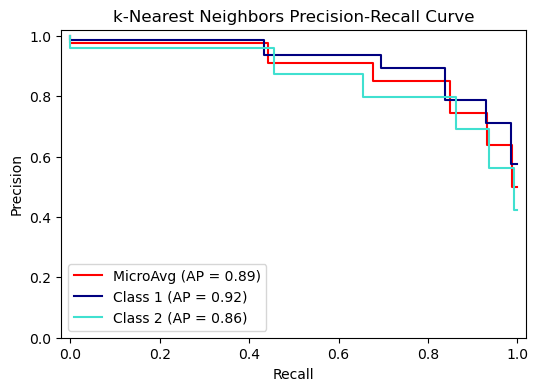

In [ ]:
# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# MicroAvg calcola score di tutte le classi
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])

_, ax = plt.subplots(figsize=(6, 4))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="MicroAvg", color="red")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Class {i+1}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([-.02, 1.02])
ax.set_ylim([0.0, 1.02])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("k-Nearest Neighbors Precision-Recall Curve")
plt.show()